# Experiment 4: Adjacency Map as data structure for Graphs

[//]: # (------------------------------------------    DO NOT MODIFY THIS    ------------------------------------------)
<style type="text/css">
.tg  {border-collapse:collapse;
      border-spacing:0;
     }
.tg td{border-color:black;
       border-style:solid;
       border-width:1px;
       font-family:Arial, sans-serif;
       font-size:14px;
       overflow:hidden;
       padding:10px 5px;
       word-break:normal;
      }
.tg th{border-color:black;
       border-style:solid;
       border-width:1px;
       font-family:Arial, sans-serif;
       font-size:14px;
       font-weight:normal;
       overflow:hidden;
       padding:10px 5px;
       word-break:normal;
      }
.tg .tg-fymr{border-color:inherit;
             font-weight:bold;
             text-align:left;
             vertical-align:top
            }
.tg .tg-0pky{border-color:inherit;
             text-align:left;
             vertical-align:top
            }
[//]: # (--------------------------------------------------------------------------------------------------------------)

[//]: # (-------------------------------------    FILL THIS OUT WITH YOUR DATA    -------------------------------------)
</style>
<table class="tg">
    <tbody>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Title:</td>
        <td class="tg-0pky">Experiment 4: Adjacency Map as data structure for Graphs</td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Authors:</td>
        <td class="tg-0pky">
            <a href="https://github.com/ecarrenolozano" target="_blank" rel="noopener noreferrer">Edwin Carreño</a>
        </td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Affiliations:</td>
        <td class="tg-0pky">
            <a href="https://www.ssc.uni-heidelberg.de/en" target="_blank" rel="noopener noreferrer">Scientific Software Center</a>
        </td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Date Created:</td>
        <td class="tg-0pky">30.10.2024</td>
      </tr>
      <tr>
        <td class="tg-fymr" style="font-weight: bold">Description:</td>
        <td class="tg-0pky">Creation of a graph using adjacency maps and data from CSV files. Conversion to NetworkX is tested too.</td>
      </tr>
    </tbody>
</table>

[//]: # (--------------------------------------------------------------------------------------------------------------)

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  
</table>

## Overview

In this notebook we are going to:

1. Import CSV (comma-separated values) data from nodes and edges.
2. Describe the data from CSVs.
3. Create a data pipeline that:
   - extract CSV data
   - transform the format for edges
   - convert the data from edges into an adjacency map (data structure)
4. Create a NetworkX graph from an Adjacency Map.

## Setup (if required)

**Note:** If your code require to install dependencies before your main code, please add the commands to install the dependencies. You can silence the messages returned by `pip` the flag `-q`, i.e. `pip install pandas -q`

### NetworkX installation

In [1]:
!pip install networkx[default] -q

## Importing Libraries

In [2]:
"""
Recommendations:
    - Respect the order of the imports, they are indicated by the numbers 1, 2, 3.
    - One import per line is recommended, with this we can track easily any modified line when we use git.
    - Absolute imports are recommended (see 3. Local application/library specific imports below), they improve readability and give better error messages.
    - You should put a blank line between each group of imports.
"""

# future-imports (for instance: from __future__ import barry_as_FLUFL)
# from __future__ import barry_as_FLUFL  

# 1. Standard library imports
import ast
import csv
import json
import os
import re

# 2. Related third party imports
import networkx as nx

# 3. Local application/library specific imports
# import <mypackage>.<MyClass>         # this is an example
# from <mypackage> import <MyClass>    # this is another example 

## Helper Functions

In [3]:
def string_contains_dictionary(string):
    pattern = r'^\s*\{.*:.*\}\s*$'  # Matches strings that resemble a dictionary
    return bool(re.match(pattern, string))
    
def string_contains_empty_dictionary(string):
    pattern = r'^\s*\{\}\s*$'
    return bool(re.match(pattern, string))

def dict_from_edgelist(edgelist):
    graph_dict = {}   # This is the data structure for a directed graph
    
    # Build an unique set of nodes
    set_nodes = set()                                    
    for rel in edgelist:
        if len(rel) == 3: # format (source_node, target_node, properties)
            source_node, target_node, _ = rel
        else:             # format (id, source_node, target_node, label, properties)
            _, source_node, target_node, _, _ = rel
        set_nodes.add(source_node)
        set_nodes.add(target_node)

    # Assigns to each node an empty dictionary
    for node in set_nodes:
        graph_dict[node]={}

    # Populate nodes with relationships and properties
    for rel in edgelist:
        if len(rel) == 3: # format (source_node, target_node, properties)
            source_node, target_node, properties = rel
            
        elif len(rel) == 5: # format (edge_id, source_node, target_node, edge_label, properties)
            edge_id, source_node, target_node, edge_label, properties = rel
            
            if isinstance(properties, str) and string_contains_dictionary(properties):
                properties = ast.literal_eval(properties)

            if isinstance(properties, str) and string_contains_empty_dictionary(properties):
                properties = ast.literal_eval(properties)
            
            if isinstance(properties, dict):
                properties["id"] = edge_id
                properties["label"] = edge_label            

        graph_dict[source_node][target_node] = properties
                                               
    return graph_dict


def load_csv_module(filepath, header=True):
    list_rows_as_tuples = []
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if header: # Skip first row when header exists
                header = False
                continue
            row = [field.strip() for field in row]
            list_rows_as_tuples.append(tuple(row))  # Add each row to the list
            
    return list_rows_as_tuples

## Introduction

## Section 1: Load the CSV data that contains nodes and edges

For this exercise, each graph is represented by two CSV files. One containing information about the **nodes** and the other about the **edges**. To indicate that both files correspond to the same graph, their names include the same number of nodes. For example:

- `dataset_30_nodes_proteins.csv`: contains 30 rows (nodes).
- `dataset_30_edges_interactions.csv`: contains 47 rows (edges).

We reference each CSV file or dataset as follows:

In [4]:
filename_nodes = "dataset_30_nodes_proteins.csv"
filename_edges = "dataset_30_edges_interactions.csv"

### 1.1: Load Nodes

The CSV file for nodes contains three columns:
- `UniProt ID`
- `label`
- `properties`

We are going to load the information of nodes as a **list of tuples**. Each tuple represents a node with the structure:
- `(id, label, properties)`
- Each field in the tuple is a `string`
- The `properties` field is a string containing a dictionary of properties.

In [5]:
filepath_nodes = os.path.join("./datasets", filename_nodes)

list_nodes = load_csv_module(filepath_nodes, header=True)

In [6]:
print("The list of NODES contains: {} nodes".format(len(list_nodes)))
print("Example:\n\t{}".format(list_nodes[0]))

The list of NODES contains: 30 nodes
Example:
	('G0P1I0', 'uniprot_protein', "{'sequence': 'QKRTLFKVEFGSMSWFYKHRTNMHLRTMMYD', 'description': 'Lorem ipsum ilymp', 'taxon': '7813'}")


### 1.2: Load Edges

The CSV file for edges contains five columns:
- `Relation ID`
- `Source ID`
- `Target ID`
- `label`
- `properties`

We are going to load the information of edges as a list of tuples. Each tuple represents a node with thethe structure:
- `(id, source, target, label, properties)`
- Each field in the tuple is a `string`
- The `properties` field is string containing a dictionary of properties.

In [7]:
filepath_edges = os.path.join("./datasets", filename_edges)

list_edges = load_csv_module(filepath_edges, header=True)

In [8]:
print("The list of EDGES contains: {} edges".format(len(list_edges)))
print("Example:")
for edge in list_edges[0:6]:
    print("\t{}".format(edge))

The list of EDGES contains: 47 edges
Example:
	('', 'B6V6V7', 'H9R6K5', 'interacts_with', "{'source': 'signor'}")
	('', 'B6V6V7', 'I5X3I2', 'interacts_with', "{'method': 'Lorem ipsum pblfc'}")
	('', '385603', 'H9R6K5', 'interacts_with', "{'source': 'intact', 'method': 'Lorem ipsum nbqvj'}")
	('', '385603', 'I9A3P8', 'interacts_with', '{}')
	('', 'L3V2Y6', 'X0C9T5', 'interacts_with', "{'source': 'intact', 'method': 'Lorem ipsum zwhrq'}")
	('intact956331', 'L3V2Y6', 'Y8Y3K0', 'interacts_with', "{'source': 'signor'}")


## Section 2: Create Data Pipeline

- **input:** CSV data of edges
- **output:** Adjacency map containing graph's data.

The pipeline consist of two consecutive stages:

| Stage | Function                      | Description |
|-------|-------------------------------| ----------- |
| 1     | `load_csv_module()`           | read the csv and load the information in memory           |
| 2     | `dict_from_edgelist(edgelist)`| create an adjacency map with the information of the graph |

### 2.1 Create Adjacency Map (data structure)

In [9]:
adj_map = dict_from_edgelist(load_csv_module(filepath_edges, header=True))

In [10]:
adj_map

{'H0U9R4': {'Q1R3N5': {'source': 'signor',
   'id': '',
   'label': 'interacts_with'},
  'C8W4F0': {'id': '', 'label': 'interacts_with'}},
 'H1M7P2': {'373262': {'source': 'signor',
   'method': 'Lorem ipsum jmzhj',
   'id': '',
   'label': 'interacts_with'},
  '189306': {'method': 'Lorem ipsum iqlma',
   'id': 'intact631800',
   'label': 'interacts_with'}},
 'D5V7Y7': {'H1M7P2': {'source': 'signor',
   'id': 'intact51967',
   'label': 'interacts_with'}},
 'I0S4T8': {'C8W4F0': {'id': 'intact538978', 'label': 'interacts_with'}},
 'X0C9T5': {'535278': {'source': 'signor',
   'id': '',
   'label': 'interacts_with'}},
 '373262': {},
 'U9P9L6': {'X0C9T5': {'method': 'Lorem ipsum bxjad',
   'id': 'intact795446',
   'label': 'interacts_with'}},
 'Q1R3N5': {'I0S4T8': {'id': '', 'label': 'interacts_with'},
  'H0U9R4': {'source': 'intact',
   'id': 'intact260500',
   'label': 'interacts_with'}},
 '447972': {'H0U9R4': {'source': 'intact',
   'method': 'Lorem ipsum jkoie',
   'id': 'intact556444',

In [11]:
first_key, first_value = next(iter(adj_map.items()))
formatted_json = json.dumps({first_key: first_value}, indent=2)
print(formatted_json)

{
  "H0U9R4": {
    "Q1R3N5": {
      "source": "signor",
      "id": "",
      "label": "interacts_with"
    },
    "C8W4F0": {
      "id": "",
      "label": "interacts_with"
    }
  }
}


In [12]:
ds_map = {
	"I5X3I2": {
		"edges": {
			"D4X6C4": {
				"source": "intact",
				"method": "Lorem ipsum iiozd",
				"id": "",
				"label": "interacts_with",
			},
			"T9Z8Y0": {
				"method": "Lorem ipsum gconp",
				"id": "intact994853",
				"label": "interacts_with",
			}
		},
		"properties": {
				'sequence': 'WSAAEAGGAELALDFWLVASRKKYGMLQVT',
				'description': 'Lorem ipsum ddbvb',
				'taxon': '4186'
		}
	}
}

In [13]:
ds_map["I5X3I2"]["edges"]

{'D4X6C4': {'source': 'intact',
  'method': 'Lorem ipsum iiozd',
  'id': '',
  'label': 'interacts_with'},
 'T9Z8Y0': {'method': 'Lorem ipsum gconp',
  'id': 'intact994853',
  'label': 'interacts_with'}}

## Section 3: Creating NetworkX 

In [14]:
try:
    G.clear()
    print("Graph has been cleared!")
except:
    print("Graph G doesn't exist")

Graph G doesn't exist


### 3.1 Create a Directed Graph

In [15]:
G = nx.from_dict_of_dicts(adj_map, create_using=nx.DiGraph)

### 3.2 Draw Graph

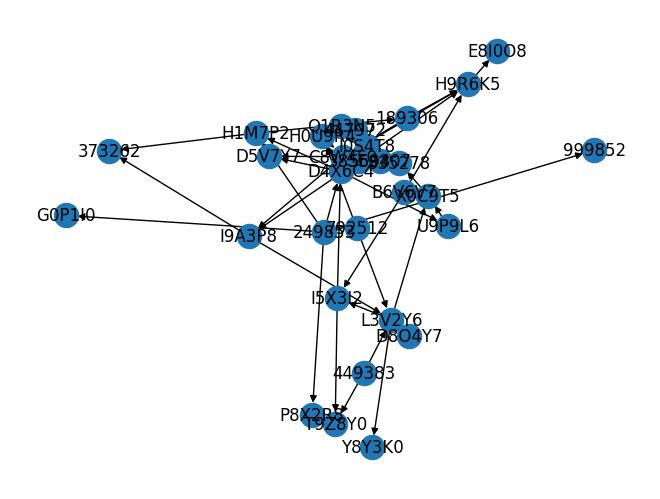

In [16]:
nx.draw(G, with_labels=True)

### 3.3 Some statistics

In [17]:
print("Number of nodes: {}".format(G.number_of_nodes()))
print("Number of edges: {}".format(G.number_of_edges()))

Number of nodes: 30
Number of edges: 47


In [18]:
limit = 5
for index, edge in enumerate(G.edges(data=True)):
    if index == limit:
        break
    print(edge)

('H0U9R4', 'Q1R3N5', {'source': 'signor', 'id': '', 'label': 'interacts_with'})
('H0U9R4', 'C8W4F0', {'id': '', 'label': 'interacts_with'})
('H1M7P2', '373262', {'source': 'signor', 'method': 'Lorem ipsum jmzhj', 'id': '', 'label': 'interacts_with'})
('H1M7P2', '189306', {'method': 'Lorem ipsum iqlma', 'id': 'intact631800', 'label': 'interacts_with'})
('D5V7Y7', 'H1M7P2', {'source': 'signor', 'id': 'intact51967', 'label': 'interacts_with'})


## More experimentation

In [19]:
nodes_properties = {
    "I5X3I2": {
      'sequence': 'WSAAEAGGAELALDFWLVASRKKYGMLQVT',
      'description': 'Lorem ipsum ddbvb',
      'taxon': '4186'
    }
}


adj_map = {
  "I5X3I2": 
  {
    "D4X6C4": 
      {
        "source": "intact",
        "method": "Lorem ipsum iiozd",
        "id": "",
        "label": "interacts_with",
      },
      "T9Z8Y0": {
        "method": "Lorem ipsum gconp",
        "id": "intact994853",
        "label": "interacts_with",
      }
  }  
}

In [20]:
H = nx.from_dict_of_dicts(adj_map)

In [21]:
H.edges(data=True)

EdgeDataView([('I5X3I2', 'D4X6C4', {'source': 'intact', 'method': 'Lorem ipsum iiozd', 'id': '', 'label': 'interacts_with'}), ('I5X3I2', 'T9Z8Y0', {'method': 'Lorem ipsum gconp', 'id': 'intact994853', 'label': 'interacts_with'})])

In [22]:
H.nodes(data=True)

NodeDataView({'I5X3I2': {}, 'D4X6C4': {}, 'T9Z8Y0': {}})

In [23]:
H.add_node("I5X3I2", **nodes_properties["I5X3I2"])

In [24]:
H.nodes(data=True)

NodeDataView({'I5X3I2': {'sequence': 'WSAAEAGGAELALDFWLVASRKKYGMLQVT', 'description': 'Lorem ipsum ddbvb', 'taxon': '4186'}, 'D4X6C4': {}, 'T9Z8Y0': {}})

In [27]:
my_dict={'A': {'1': {'info': 'A is equal to 1', 'mass=': 1}},
         'B': {'2': {'info': 'B is equal to 2', 'mass=': 2},
               'A': {'info': 'B follows A', 'mass=': 1.0}},
         'C': {'3': {'info': 'C is equal to 3', 'mass=': 3},
               'B': {'info': 'C follows B', 'mass=': 2.0},
               'A': {'info': 'C follows A', 'mass=': 3.0}
              }
        }

my_dict

{'A': {'1': {'info': 'A is equal to 1', 'mass=': 1}},
 'B': {'2': {'info': 'B is equal to 2', 'mass=': 2},
  'A': {'info': 'B follows A', 'mass=': 1.0}},
 'C': {'3': {'info': 'C is equal to 3', 'mass=': 3},
  'B': {'info': 'C follows B', 'mass=': 2.0},
  'A': {'info': 'C follows A', 'mass=': 3.0}}}

In [28]:
J = nx.from_dict_of_dicts(my_dict, create_using=nx.DiGraph())

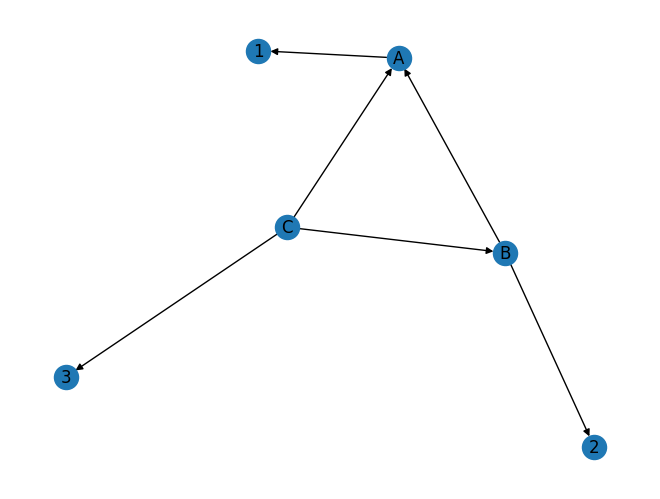

In [29]:
nx.draw(J, with_labels=True)

In [30]:
J.edges(data=True)

OutEdgeDataView([('A', '1', {'info': 'A is equal to 1', 'mass=': 1}), ('B', '2', {'info': 'B is equal to 2', 'mass=': 2}), ('B', 'A', {'info': 'B follows A', 'mass=': 1.0}), ('C', '3', {'info': 'C is equal to 3', 'mass=': 3}), ('C', 'B', {'info': 'C follows B', 'mass=': 2.0}), ('C', 'A', {'info': 'C follows A', 'mass=': 3.0})])